# PART I - Classification Model From Semester A
#####  @ Haim Goldfisher

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

## KNN was the most accurate model for this dataset, with 98.7 % of success.


## If you like to jump into the improved model, click here <a href=#bookmark>Data Visualization - Semester B</a>

# DATASET : Wine Type Classification

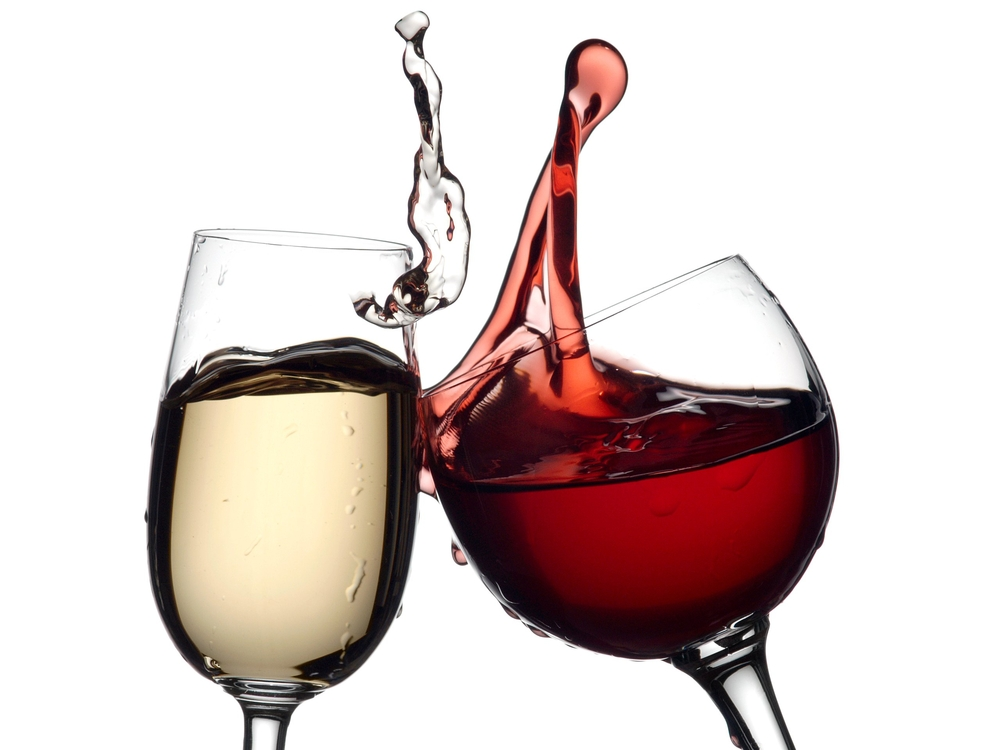

### Quick review:
##### Link to the dataset: https://www.kaggle.com/ahmettezcantekin/beginner-datasets
I Chose wine as my dataset. I would like to create a model which will predict the type of the wine(red/white), according to it's features.
At first, I thought that this model might be a little stupid. We have eyes, we also have mouth. There is no problem to recognize the difference between white and red wine. However, a model has no senses. It can't taste the wine or see it color. The idea that we can use only data to predict at first the color of the wine, and after it to connect person to specific wine, is a big thing. This model may looks a little boring to you, but to me it is the first step of a long journey.

Firstly, we will upload the dataset:

In [2]:
wine = pd.read_csv('C:\Haim\Anaconda\wine.csv')

wine # display the first and last 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Explantion for the features:
- **fixed acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
- **volatile acidity:** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
- **citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines.
- **residual sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- **chlorides:** the amount of salt in the wine.
- **free sulfur dioxide:** the free form of $SO_2$ exists in equilibrium between molecular $SO_2$ (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
- **total sulfur dioxide:** amount of free and bound forms of $SO_2$; in low concentrations, $SO_2$ is mostly undetectable in wine, but at free $SO_2$ concentrations over 50 ppm, $SO_2$ becomes evident in the nose and taste of wine.
- **density:** the density of water is close to that of water depending on the percent alcohol and sugar content.
- **pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
- **sulphates:** a wine additive which can contribute to sulfur dioxide gas $(SO_2)$ levels, wich acts as an antimicrobial and antioxidant.
- **alcohol:** the percent alcohol content of the wine.
- **quality:** score between 0 and 10.
- **type:** red/white.


In [3]:
wine.info() # we would like to see if we have null values in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
wine.shape # 6497 rows and 13 columns

(6497, 13)

In [5]:
wine.isnull().sum() #for NaN

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [6]:
wine.duplicated().sum() # duplicates may point on the same wine, it can make our model unstable

1177

We have 1,177 duplicated rows, we can infer that it referrence to the same wine. Let's drop those rows for better results for our model.

In [7]:
wine = wine.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [8]:
wine.shape # 5320 rows and 13 columns

(5320, 13)

At first, we had 6,497 rows. Now we have 5,320 rows.

In [9]:
count_cat = wine.nunique() # it shows us how much unique examples we have in each feature

In [10]:
count_cat

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
dtype: int64

It let us understand how much "categories" we have for each column.

In [11]:
wine["type"].value_counts() # it let us understand the number of the examples we have in the dataset

white    3961
red      1359
Name: type, dtype: int64

In [12]:
# The distribution of the examples in our dataset
wine["type"].value_counts("white")*100 # in %
wine["type"].value_counts("red")*100 # in %

white    74.454887
red      25.545113
Name: type, dtype: float64

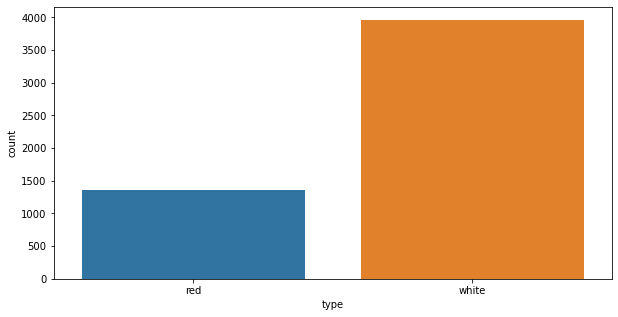

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x = wine['type']); # we will plot it for better illustration

It seems that we have much more white wine than red wine. It will be usefull for our dummy classifier.

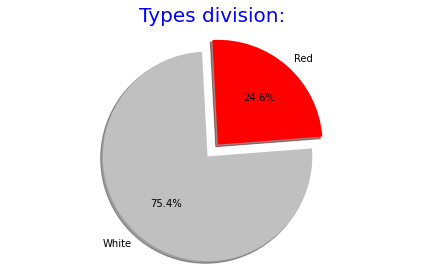

In [14]:
# Pie chart
labels = ['White', 'Red'] # every label represnts a type
pie_x = 0.753886 # the distribution
pie_y = 0.246114 # the distribution
sizes = [pie_x,pie_y] # we have two types and their distribution
explode = (0, 0.15) # the distance between the pic slicers
col_pie = ["silver","red"] # for the colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=col_pie, autopct='%1.1f%%',
        shadow=True, startangle=93)
# equal aspect ratio ensures that pie is drawn as a circle
plt.title("Types division:", size=20, color="blue")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

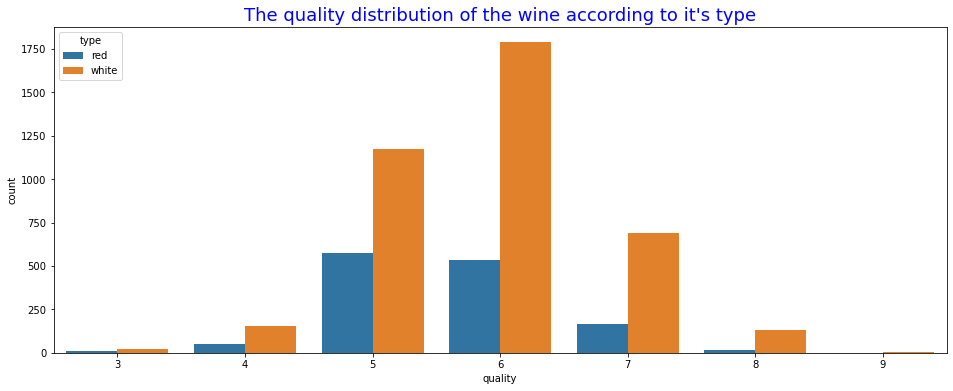

In [15]:
# another plot to show us more intersting details about the dataset
plt.figure(figsize = (16,6))
plt.title("The quality distribution of the wine according to it's type", size=18, color='b')
sns.countplot(wine['quality'], hue = wine['type']);

We can see that we have some quality for each wine. Let's take a look on it:

In [16]:
wine["quality"].value_counts() # the amount of wine we have from each quality number

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

We can also display this by a dataframe:

In [17]:
red_per_quality = wine.loc[wine["type"]=='red']["quality"].value_counts() # only the red wine, the sum is sorted by quality
white_per_quality = wine.loc[wine["type"]=='white']["quality"].value_counts() # only white...
quality_dist = pd.DataFrame({ # new df for our two new series
        'red': red_per_quality,
        'white':white_per_quality})
quality_dist.fillna(value = 0, inplace=True) # if we dont have any data = we dont't have wine from that quality

quality_dist

,red,white
3,10.0,20
4,53.0,153
5,577.0,1175
6,535.0,1788
7,167.0,689
8,17.0,131
9,0.0,5


We can also take only the red wine which it's quality is 6:

In [18]:
red_wine = wine.loc[wine["type"]=='red'] # we chose only red wine
red_wine_5 = red_wine.loc[red_wine["quality"]==6] # we chose only quality 6
red_wine_5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,red
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6,red
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6,red
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,red
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red


Let's try something else, we will groupby the wine into type groups to see which one has a greater quality:

In [19]:
df_types = wine.groupby('type') #by type
df_types

In [20]:
df_types.quality.mean() # the mean of the quality for each type

type
red      5.623252
white    5.854835
Name: quality, dtype: float64

As we can see, the white wine that we have in the dataset, has a little bit better quality than the red wine.

In [21]:
encoder = LabelEncoder()
wine['type'] = encoder.fit_transform(wine['type'])
# red = 0
# white = 1

<ipython-input-21-1ca5644f765f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['type'] = encoder.fit_transform(wine['type'])


In [22]:
wine["type"].value_counts()

1    3961
0    1359
Name: type, dtype: int64

In [23]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


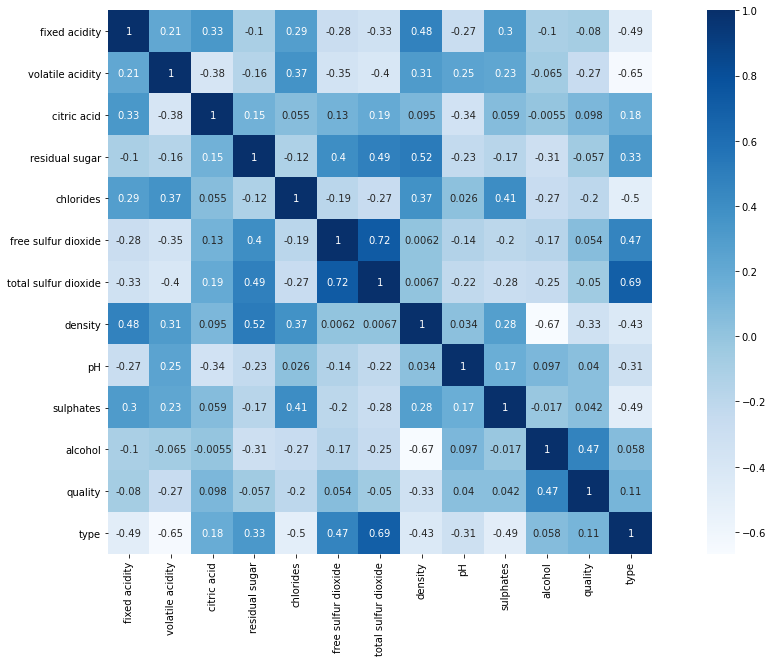

In [24]:
#I want to know the correalation between each feature
plt.figure(figsize=(20, 10))
sns.heatmap(wine.corr(), square=True, annot=True, cmap="Blues");

Heatmap is a super important tool, because it tells us the bigger story.
As we can see, total sulfur dioxide has a huge effect on the type of the wine (0.7 of correalation). free sulfur dioxide takes the 2nd place with 0.47 of correalation. After it, the residual sugar with 0.35 of correalation.
Another intersting thing is the fact that the quality of the wine has a connection to the type of the wine. It will be intresting to find out which one of the types has the higher quality.

We would like to see the impact of total sulfur dioxide, free sulfur dioxide and residual sugar on the wine's type. Let's go back to the graphs.

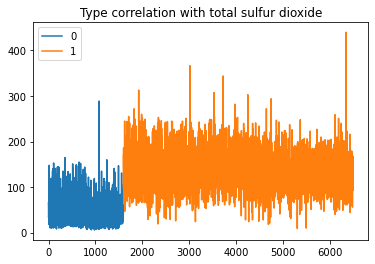

In [25]:
wine.groupby('type')['total sulfur dioxide'].plot(title="Type correlation with total sulfur dioxide", legend=True);
# the most important thing here is to watch the difference between the red and white wine
# we can also see that there are a few outliers 

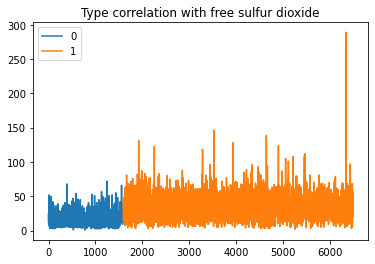

In [26]:
wine.groupby('type')['free sulfur dioxide'].plot(title="Type correlation with free sulfur dioxide", legend=True);

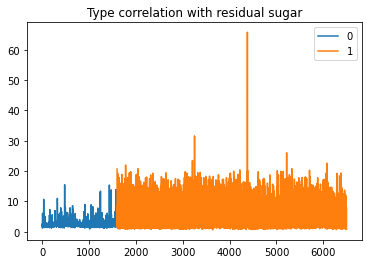

In [27]:
wine.groupby('type')['residual sugar'].plot(title="Type correlation with residual sugar", legend=True);

In [28]:
wine.describe() # more info about our dataset before the models part

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


# Scaling

In [29]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
ss = StandardScaler()
df = wine
df[features] = ss.fit_transform(df[features])
df.head(3)

<ipython-input-29-af99e9ace4b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = ss.fit_transform(df[features])
C:\Haim\Anaconda\Python\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.140064,2.115349,-2.164515,-0.699699,0.523880,-1.069272,-1.411143,1.100996,1.779304,0.177941,-0.969152,-0.904497,0
1,0.443199,3.185297,-2.164515,-0.544135,1.120736,-0.282905,-0.829839,0.763753,-0.153797,0.979389,-0.631833,-0.904497,0
2,0.443199,2.471998,-1.892672,-0.610806,0.957957,-0.844596,-1.058837,0.831202,0.220351,0.779027,-0.631833,-0.904497,0


In [30]:
#df['type']=df['type'].map({'red':0,'white':1})
#df

### Training - Testing split

In [31]:
target=df['type'] # the feature we would like to predict, the type of the wine
data=df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0) #train\test split

The default split is 75% train , 25% test.

In [32]:
X_train.shape # 3990 rows, 12 columns

(3990, 12)

In [33]:
X_test.shape # 1330 rows, 12 columns

(1330, 12)

In [34]:
y_train.shape # 3990 rows, one column

(3990,)

In [35]:
y_test.shape # 1330 rows, one columns

(1330,)

# Dummy Classifier

#### Our model must be better than this model.

In [36]:
# our options: 'most_frequent', 'stratified', 'uniform', 'constant', 'prior')
# I chose the best dummy classifier from all those options (please, believe me)

dm = DummyClassifier(strategy='most_frequent', random_state=0)
# random_state = 0 assure the result will be the same every time we run the model (no random results)
dm.fit(X_train,y_train) # training the model
dm

DummyClassifier(random_state=0, strategy='most_frequent')

In [37]:
y_pred = dm.predict(X_test) # predict the result

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.75      1.00      0.85       992

    accuracy                           0.75      1330
   macro avg       0.37      0.50      0.43      1330
weighted avg       0.56      0.75      0.64      1330



C:\Haim\Anaconda\Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The most frequent strategy goes always after the majority. In our case, that every wine is white, because 75% of the wine is white.

Here's a reminder for a confusion matrix values:

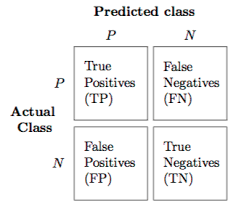

Text(33.0, 0.5, 'Actual')

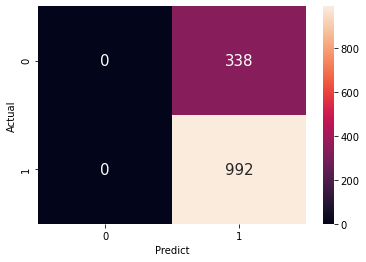

In [39]:
cm_dm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

## ROC Curve

#### A graph showing the performance of an ambiguous classifier, due to the decision threshold set for it. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) under different acceptance thresholds.

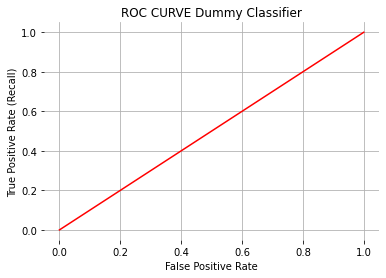

The score for the ROC Curve is: 50.0%


In [40]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='r')
plt.box(False)
plt.title('ROC CURVE Dummy Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dummy_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# KNN - K-Nearest Neighbors

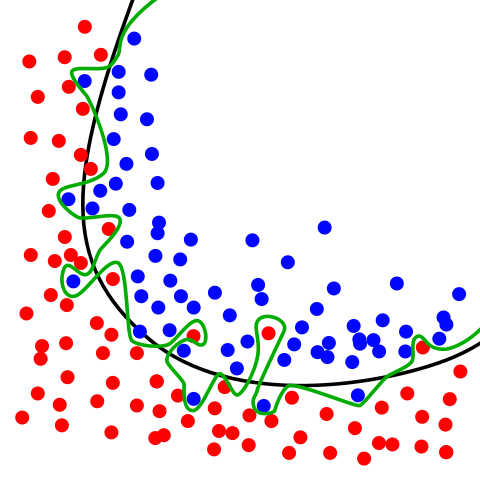

#### The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(X_test)

In [43]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



### Cross validation:

#### The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset.


##### For illustration:

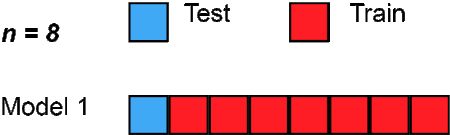

In [44]:
k_range = list(range(3,51)) # we will test k values in range 3-50
weight_op = ['uniform', 'distance'] # we will test the knn methods uniform & distance
d = {'n_neighbors' :k_range, 'weights': weight_op}

In [45]:
grid_temp = GridSearchCV(knn, d, cv=10, scoring='accuracy') # we chose model, d(range, methods), num of cv groups and scoring method
grid_temp.fit(data, target)
print("score:",grid_temp.best_score_," params:",grid_temp.best_params_)

score: 0.9930451127819551  params: {'n_neighbors': 6, 'weights': 'distance'}


As we can see, the grid search found the ideal k (6) and knn strategy (distance) for us. Let's use them for better performance for our model.

In [46]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [47]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [48]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(33.0, 0.5, 'Actual')

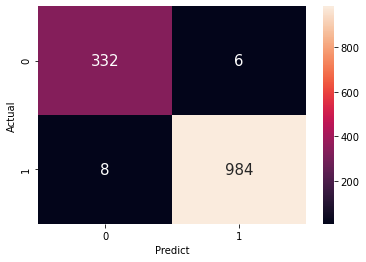

In [49]:
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

## ROC Curve

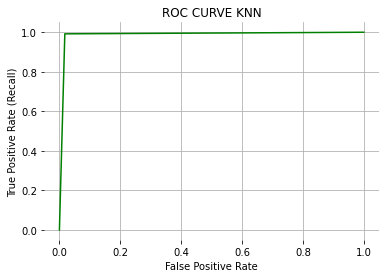

The score for the ROC Curve is: 98.7%


In [50]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='g')
plt.box(False)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

knn_auc = round(auc,3)*100

print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Decision Tree

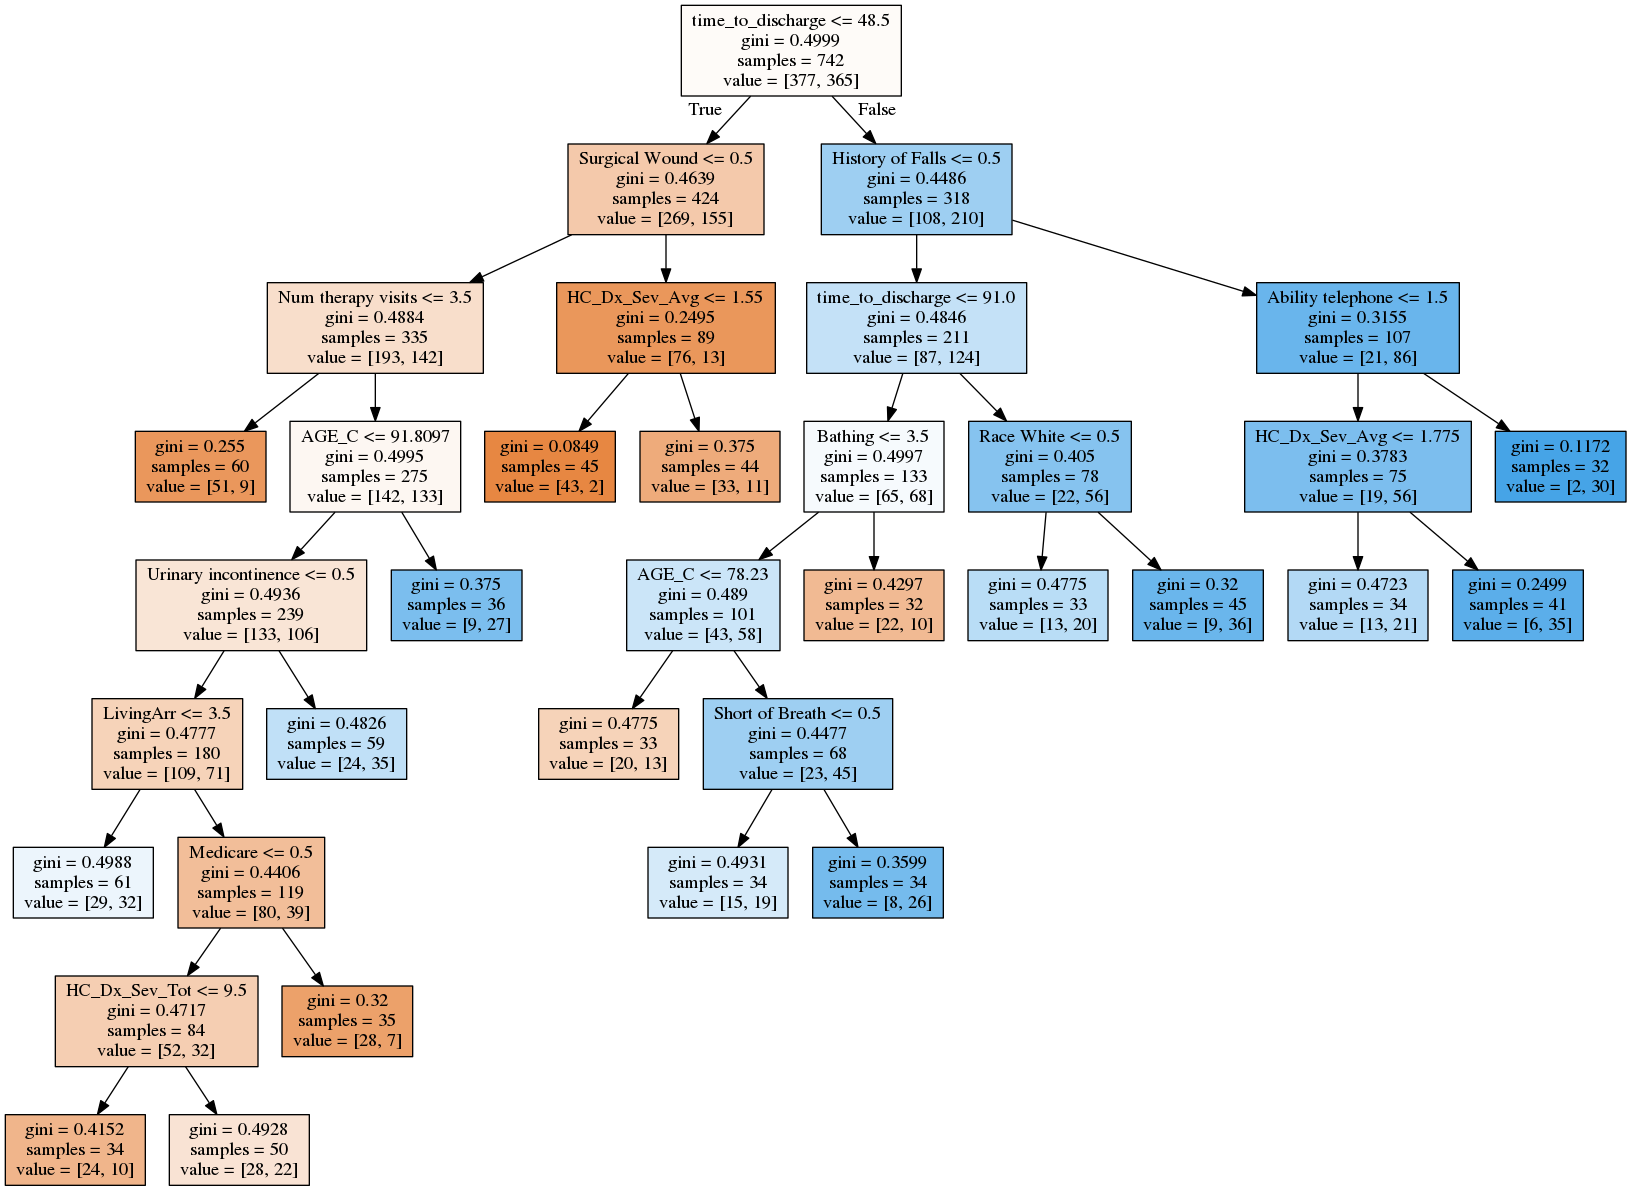

#### A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. Criterion is the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Splitter is the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

In [51]:
dct = DecisionTreeClassifier(random_state=0) # gini and best are the default
dct = dct.fit(X_train,y_train)
dct

DecisionTreeClassifier(random_state=0)

In [52]:
y_pred = dct.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       338
           1       0.99      0.98      0.99       992

    accuracy                           0.98      1330
   macro avg       0.97      0.98      0.97      1330
weighted avg       0.98      0.98      0.98      1330



α (alpha) is a tuning parameter that we finding using cross validation.

In [54]:
path = dct.cost_complexity_pruning_path(X_train,y_train)
alphas = path.ccp_alphas
impurities = path.impurities
# it returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process
alphas

array([0.00000000e+00, 1.66949087e-04, 2.00030607e-04, 2.45712320e-04,
       2.48988484e-04, 2.49989650e-04, 2.99469756e-04, 3.31659497e-04,
       3.75939850e-04, 3.75939850e-04, 3.76689595e-04, 4.17710944e-04,
       4.51127820e-04, 4.76190476e-04, 4.91228070e-04, 4.94984391e-04,
       4.97567448e-04, 5.77918304e-04, 7.51879699e-04, 7.51879699e-04,
       7.51879699e-04, 8.35421888e-04, 9.29755582e-04, 9.66702470e-04,
       9.85018938e-04, 1.00250627e-03, 1.07910973e-03, 1.11546860e-03,
       1.15003342e-03, 1.46832836e-03, 1.58290463e-03, 1.92972212e-03,
       1.97833961e-03, 3.09516524e-03, 3.54018667e-03, 4.37447017e-03,
       6.70710472e-03, 1.64639731e-02, 2.96137992e-02, 4.18148968e-02,
       2.39582664e-01])

In [55]:
d = {'ccp_alpha':alphas}
d

{'ccp_alpha': array([0.00000000e+00, 1.66949087e-04, 2.00030607e-04, 2.45712320e-04,
        2.48988484e-04, 2.49989650e-04, 2.99469756e-04, 3.31659497e-04,
        3.75939850e-04, 3.75939850e-04, 3.76689595e-04, 4.17710944e-04,
        4.51127820e-04, 4.76190476e-04, 4.91228070e-04, 4.94984391e-04,
        4.97567448e-04, 5.77918304e-04, 7.51879699e-04, 7.51879699e-04,
        7.51879699e-04, 8.35421888e-04, 9.29755582e-04, 9.66702470e-04,
        9.85018938e-04, 1.00250627e-03, 1.07910973e-03, 1.11546860e-03,
        1.15003342e-03, 1.46832836e-03, 1.58290463e-03, 1.92972212e-03,
        1.97833961e-03, 3.09516524e-03, 3.54018667e-03, 4.37447017e-03,
        6.70710472e-03, 1.64639731e-02, 2.96137992e-02, 4.18148968e-02,
        2.39582664e-01])}

### Cross validation:

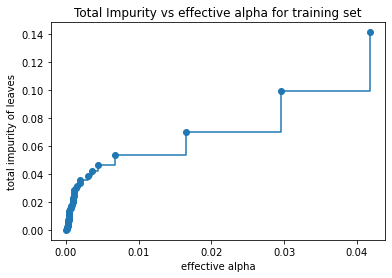

In [56]:
fig, ax = plt.subplots()
ax.plot(alphas[:-1], impurities[:-1], marker = 'o', drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");
#  as alpha increases, more of the tree is pruned, which increases the total impurity of its leaves

In [57]:
grid_dct = GridSearchCV(dct, d, cv=10, scoring='accuracy')
grid_dct.fit(data, target)
print("score:", grid_dct.best_score_, " params:", grid_dct.best_params_)

score: 0.9800751879699249  params: {'ccp_alpha': 0.0004761904761904761}


As we can see, the grid search found the optimal alpha for us. We will use that alpha to improve our model results

In [58]:
dct = DecisionTreeClassifier(ccp_alpha = 0.0004761904761904761)
dct = dct.fit(X_train, y_train)
dct

DecisionTreeClassifier(ccp_alpha=0.0004761904761904761)

In [59]:
y_pred = dct.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       338
           1       0.99      0.98      0.98       992

    accuracy                           0.98      1330
   macro avg       0.97      0.97      0.97      1330
weighted avg       0.98      0.98      0.98      1330



Text(33.0, 0.5, 'Actual')

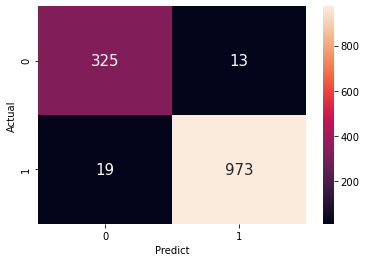

In [61]:
cm_dct = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dct,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

Let's take a look at the decision tree of our model:

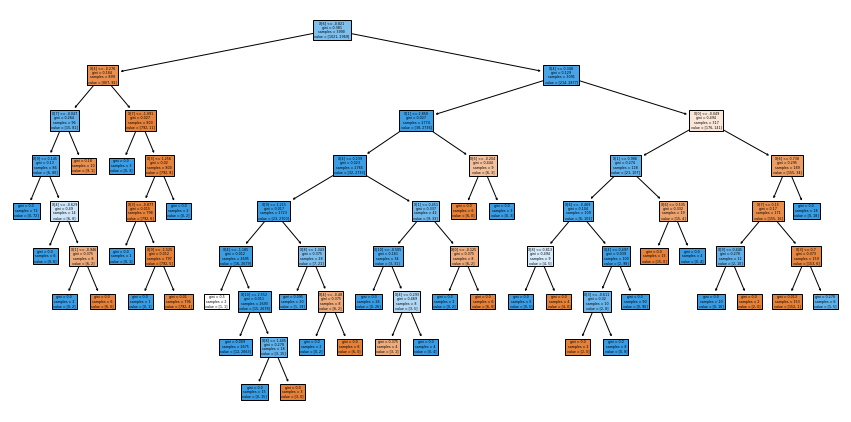

In [62]:
plt.figure(figsize=(15,7.5))
plot_tree(dct,filled=True);

## ROC Curve

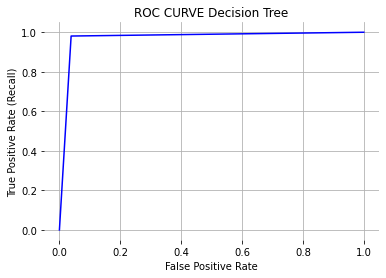

The score for the ROC Curve is: 97.1%


In [63]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='b')
plt.box(False)
plt.title('ROC CURVE Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dct_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Logistic Regression

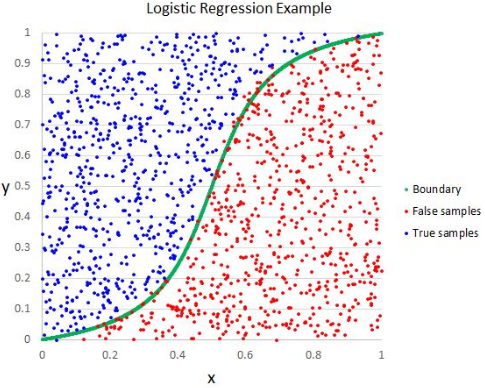

#### A statistical model that describes a possible relationship between a qualitative / categorical variable, known as the "explained variable", and other variables called "explanatory variables". The explanatory variables can be qualitative or quantitative. The model makes it possible to estimate the extent of the effect of a change in its value on each of the variables that explain the value of the explained variable. In other words, the model makes it possible to estimate correlations between the explanatory variables and the explained variable.

In [64]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       338
           1       0.99      1.00      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.98      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(33.0, 0.5, 'Actual')

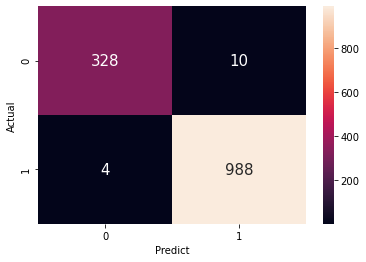

In [66]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

In [67]:
print(metrics.accuracy_score(y_test, predictions))

0.9894736842105263


## ROC Curve

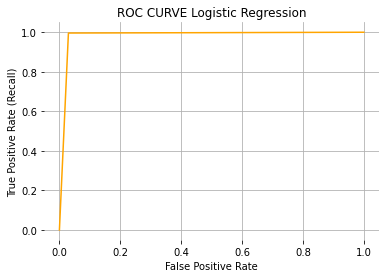

The score for the ROC Curve is: 98.3%


In [68]:
fpr, tpr, _= roc_curve(y_test, predictions)
auc= roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="auc="+str(auc), color='orange')
plt.box(False)
plt.title('ROC CURVE Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

lr_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Conclusion

In [69]:
print("The score for the models:\n")
print("Dummy Classifer:      ",dummy_auc,"%")
print("KNN:                  ",knn_auc,"%")
print("Decision Tree:        ",dct_auc,"%")
print("Logistic Regression:  ",lr_auc,"%")

The score for the models:

Dummy Classifer:       50.0 %
KNN:                   98.7 %
Decision Tree:         97.1 %
Logistic Regression:   98.3 %


## It can be concluded that KNN is the most accurate model for our dataset, with 98.7 percentages of success.

<a name='bookmark' />



# Data Visualization: Improvement Part

#### By using new tools and new models, we would like to get a better result than 98.7% of success.

In [142]:
import warnings

# new models:

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

#from sklearn.linear_model import RidgeCV
#from sklearn.svm import LinearSVR

# A model that I learned by myself: CatBoost + Plotly

from catboost import CatBoostClassifier
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

# Clustering:

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

#PCA:

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA

#Scaling:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [132]:
wine_df = pd.read_csv('C:\Haim\Anaconda\wine.csv')

wine_df.sample(n = 5, random_state = 123).sort_values(by = 'type') # 5 random samples from the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1321,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red
547,10.6,0.31,0.49,2.50,0.067,6.0,21.0,0.99870,3.26,0.86,10.7,6,red
2767,7.2,0.20,0.38,1.00,0.037,21.0,74.0,0.99180,3.21,0.37,11.0,5,white
5069,6.7,0.24,0.30,3.85,0.042,105.0,179.0,0.99189,3.04,0.59,11.3,8,white
5780,6.6,0.25,0.32,5.60,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6,white


describe per type:

In [5]:
wine_df[wine_df['type']=='red'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_df[wine_df['type']=='white'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


according to the article https://towardsdatascience.com/how-to-reduce-the-size-of-a-pandas-dataframe-in-python-7ed6e4269f88, we will reduce the size of the Dataframe:

In [7]:
wine_df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 999.5 KB


In [8]:
## downcasting loop
for column in wine_df:
    if wine_df[column].dtype == 'float64':
        wine_df[column]=pd.to_numeric(wine_df[column], downcast='float')
    if wine_df[column].dtype == 'int64':
        wine_df[column]=pd.to_numeric(wine_df[column], downcast='integer')
## dropping an unused column
#df = df.drop('item_name',axis =1)

In [6]:
wine_df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float32
 1   volatile acidity      6497 non-null   float32
 2   citric acid           6497 non-null   float32
 3   residual sugar        6497 non-null   float32
 4   chlorides             6497 non-null   float32
 5   free sulfur dioxide   6497 non-null   float32
 6   total sulfur dioxide  6497 non-null   float32
 7   density               6497 non-null   float32
 8   pH                    6497 non-null   float32
 9   sulphates             6497 non-null   float32
 10  alcohol               6497 non-null   float32
 11  quality               6497 non-null   int8   
 12  type                  6497 non-null   object 
dtypes: float32(11), int8(1), object(1)
memory usage: 675.9 KB


##### We will convert 'red'/'white' wine type to 1/0:

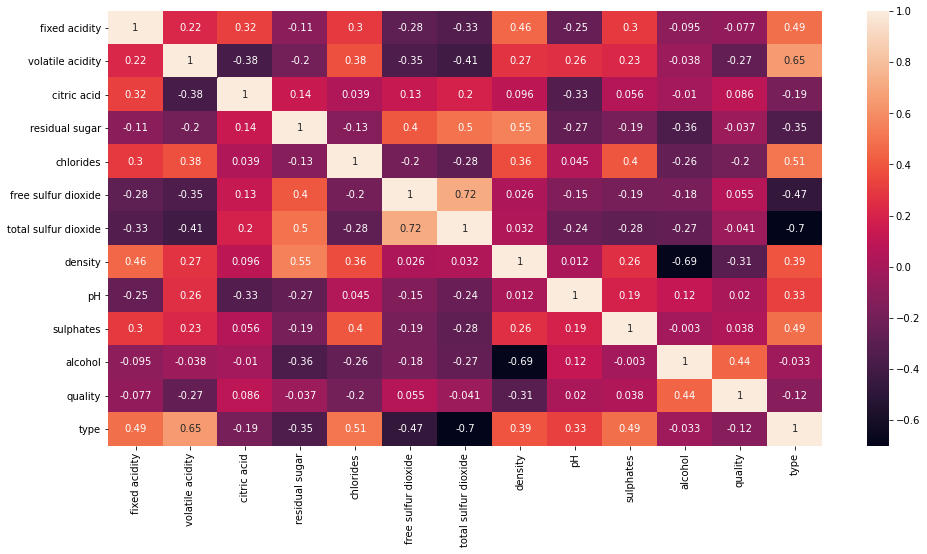

In [9]:
corr = wine_df

mapper = {'red':1, 'white':0}
corr['type'] = corr.type.map(mapper)

plt.figure(figsize=(16, 8))
sns.heatmap(corr.corr(), square=False, annot=True);

In [51]:
# A function to show the labels
def num_to_name(label):
    labeled = label.copy()
    mapping = {1:'red', 0:'white'}
    labeled = label.map(mapping)
    return labeled

### Data/Target Split:

In [127]:
target = wine_df['type'] # the feature we would like to predict, the type of the wine
data = wine_df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it

## Data Processing

### Dimensionality Reduction by PCA:

We would like to use PCA for dimensionality reduction:

In [63]:
# I want to understand how reduction of features will harm the understanding of the data:

pca = PCA() # all features (12)
X_reduced = pca.fit_transform(data)
print(pca.explained_variance_ratio_)

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    title = "Explained variance as a function of the number of dimensions:",
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul * 100,
    labels={"x": "# of Features", "y": "Explained Variance"},
    width = 1000 ,
    height = 500
)

[9.5355278e-01 4.0622361e-02 4.8255622e-03 4.9443229e-04 3.4668914e-04
 1.3641080e-04 8.6794153e-06 5.6959839e-06 4.1355502e-06 2.9356956e-06
 2.1944309e-07 1.5925962e-10]


Choosing our PCA value:

In [89]:
pca = PCA(n_components=3)

#### We can see that the reduction of the dimentions didn't hurt the understanding of the data. We can use 3 dimentions instead of 12 and still have 99.9% of explained data.

In [90]:
components = pca.fit_transform(data)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color = num_to_name(target),
    color_discrete_sequence=["red", "grey"],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [75]:
# 2D version:

total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    components, x=0, y=1, color = num_to_name(target),
    color_discrete_sequence=["red", "grey"],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show()

### Training/Testing Split:

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced, target, random_state=0) #train\test split after PCA

### Scaling:

In [118]:
pipe = make_pipeline(StandardScaler(),PCA(n_components=0.9), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9956923076923077

In [119]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=0.9), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9956923076923077

In [120]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=0.9), KNeighborsClassifier()) # pipe & knn
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('knn', KNeighborsClassifier())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9926153846153846

In [121]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=0.9), AdaBoostClassifier()) # pipe & knn
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('ada', AdaBoostClassifier())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9938461538461538

In [109]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=0.9), GradientBoostingClassifier()) # pipe & knn
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('gradient', GradientBoostingClassifier())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9938461538461538

In [110]:
pipe = make_pipeline(StandardScaler(),PCA(n_components=0.9), XGBClassifier()) # pipe & knn
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('XGB', XGBClassifier())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
warnings.filterwarnings('ignore')

[21:36:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


##### https://hanishrohit.medium.com/whats-so-special-about-catboost-335d64d754ae

In [122]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=0.9), CatBoostClassifier()) # pipe & catboost
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('catBoost', CatBoostClassifier())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

Learning rate set to 0.020257
0:	learn: 0.6608504	total: 5.04ms	remaining: 5.03s
1:	learn: 0.6273097	total: 9.42ms	remaining: 4.7s
2:	learn: 0.5974219	total: 15.7ms	remaining: 5.22s
3:	learn: 0.5672568	total: 19.7ms	remaining: 4.92s
4:	learn: 0.5382054	total: 24ms	remaining: 4.77s
5:	learn: 0.5102755	total: 27.8ms	remaining: 4.61s
6:	learn: 0.4852148	total: 31.9ms	remaining: 4.52s
7:	learn: 0.4642778	total: 35.7ms	remaining: 4.43s
8:	learn: 0.4429993	total: 39.9ms	remaining: 4.4s
9:	learn: 0.4236936	total: 44.6ms	remaining: 4.42s
10:	learn: 0.4052387	total: 48.6ms	remaining: 4.37s
11:	learn: 0.3890291	total: 53.4ms	remaining: 4.39s
12:	learn: 0.3705751	total: 57.8ms	remaining: 4.39s
13:	learn: 0.3557710	total: 63ms	remaining: 4.44s
14:	learn: 0.3417574	total: 67.4ms	remaining: 4.42s
15:	learn: 0.3269766	total: 71.2ms	remaining: 4.38s
16:	learn: 0.3141758	total: 75.8ms	remaining: 4.38s
17:	learn: 0.3047993	total: 80.5ms	remaining: 4.39s
18:	learn: 0.2933310	total: 84.1ms	remaining: 4.34

183:	learn: 0.0369496	total: 701ms	remaining: 3.11s
184:	learn: 0.0367600	total: 705ms	remaining: 3.1s
185:	learn: 0.0366044	total: 709ms	remaining: 3.1s
186:	learn: 0.0363861	total: 712ms	remaining: 3.1s
187:	learn: 0.0362318	total: 717ms	remaining: 3.1s
188:	learn: 0.0361122	total: 720ms	remaining: 3.09s
189:	learn: 0.0359164	total: 725ms	remaining: 3.09s
190:	learn: 0.0356962	total: 729ms	remaining: 3.09s
191:	learn: 0.0354894	total: 734ms	remaining: 3.09s
192:	learn: 0.0352928	total: 738ms	remaining: 3.08s
193:	learn: 0.0351314	total: 741ms	remaining: 3.08s
194:	learn: 0.0349573	total: 745ms	remaining: 3.08s
195:	learn: 0.0347706	total: 749ms	remaining: 3.07s
196:	learn: 0.0345737	total: 753ms	remaining: 3.07s
197:	learn: 0.0344143	total: 756ms	remaining: 3.06s
198:	learn: 0.0342790	total: 760ms	remaining: 3.06s
199:	learn: 0.0341161	total: 763ms	remaining: 3.05s
200:	learn: 0.0339817	total: 767ms	remaining: 3.05s
201:	learn: 0.0337565	total: 771ms	remaining: 3.04s
202:	learn: 0.03

350:	learn: 0.0181195	total: 1.4s	remaining: 2.58s
351:	learn: 0.0180518	total: 1.4s	remaining: 2.58s
352:	learn: 0.0179971	total: 1.41s	remaining: 2.58s
353:	learn: 0.0179513	total: 1.41s	remaining: 2.57s
354:	learn: 0.0179129	total: 1.42s	remaining: 2.57s
355:	learn: 0.0178508	total: 1.42s	remaining: 2.57s
356:	learn: 0.0177726	total: 1.42s	remaining: 2.56s
357:	learn: 0.0177246	total: 1.43s	remaining: 2.56s
358:	learn: 0.0176964	total: 1.43s	remaining: 2.56s
359:	learn: 0.0176540	total: 1.44s	remaining: 2.56s
360:	learn: 0.0175591	total: 1.44s	remaining: 2.55s
361:	learn: 0.0174837	total: 1.45s	remaining: 2.55s
362:	learn: 0.0174462	total: 1.45s	remaining: 2.55s
363:	learn: 0.0173894	total: 1.46s	remaining: 2.54s
364:	learn: 0.0173143	total: 1.46s	remaining: 2.54s
365:	learn: 0.0172304	total: 1.46s	remaining: 2.54s
366:	learn: 0.0171558	total: 1.47s	remaining: 2.53s
367:	learn: 0.0170925	total: 1.47s	remaining: 2.53s
368:	learn: 0.0170248	total: 1.48s	remaining: 2.52s
369:	learn: 0.

523:	learn: 0.0112715	total: 2.1s	remaining: 1.91s
524:	learn: 0.0112404	total: 2.11s	remaining: 1.91s
525:	learn: 0.0112147	total: 2.11s	remaining: 1.9s
526:	learn: 0.0111706	total: 2.12s	remaining: 1.9s
527:	learn: 0.0111388	total: 2.12s	remaining: 1.9s
528:	learn: 0.0111171	total: 2.13s	remaining: 1.89s
529:	learn: 0.0110846	total: 2.13s	remaining: 1.89s
530:	learn: 0.0110636	total: 2.13s	remaining: 1.89s
531:	learn: 0.0110555	total: 2.14s	remaining: 1.88s
532:	learn: 0.0110234	total: 2.14s	remaining: 1.88s
533:	learn: 0.0109933	total: 2.15s	remaining: 1.87s
534:	learn: 0.0109749	total: 2.15s	remaining: 1.87s
535:	learn: 0.0109325	total: 2.16s	remaining: 1.87s
536:	learn: 0.0109050	total: 2.16s	remaining: 1.86s
537:	learn: 0.0108900	total: 2.17s	remaining: 1.86s
538:	learn: 0.0108583	total: 2.17s	remaining: 1.85s
539:	learn: 0.0108391	total: 2.17s	remaining: 1.85s
540:	learn: 0.0108205	total: 2.18s	remaining: 1.85s
541:	learn: 0.0108131	total: 2.18s	remaining: 1.84s
542:	learn: 0.01

684:	learn: 0.0079885	total: 2.8s	remaining: 1.29s
685:	learn: 0.0079796	total: 2.8s	remaining: 1.28s
686:	learn: 0.0079579	total: 2.81s	remaining: 1.28s
687:	learn: 0.0079487	total: 2.81s	remaining: 1.27s
688:	learn: 0.0079365	total: 2.81s	remaining: 1.27s
689:	learn: 0.0079234	total: 2.82s	remaining: 1.27s
690:	learn: 0.0079112	total: 2.82s	remaining: 1.26s
691:	learn: 0.0078853	total: 2.83s	remaining: 1.26s
692:	learn: 0.0078813	total: 2.83s	remaining: 1.25s
693:	learn: 0.0078689	total: 2.83s	remaining: 1.25s
694:	learn: 0.0078550	total: 2.84s	remaining: 1.25s
695:	learn: 0.0078323	total: 2.84s	remaining: 1.24s
696:	learn: 0.0078283	total: 2.85s	remaining: 1.24s
697:	learn: 0.0078229	total: 2.85s	remaining: 1.23s
698:	learn: 0.0078052	total: 2.85s	remaining: 1.23s
699:	learn: 0.0077913	total: 2.86s	remaining: 1.22s
700:	learn: 0.0077784	total: 2.86s	remaining: 1.22s
701:	learn: 0.0077699	total: 2.86s	remaining: 1.22s
702:	learn: 0.0077552	total: 2.87s	remaining: 1.21s
703:	learn: 0.

879:	learn: 0.0056215	total: 3.51s	remaining: 478ms
880:	learn: 0.0056146	total: 3.51s	remaining: 474ms
881:	learn: 0.0056095	total: 3.51s	remaining: 470ms
882:	learn: 0.0056031	total: 3.52s	remaining: 466ms
883:	learn: 0.0055826	total: 3.52s	remaining: 462ms
884:	learn: 0.0055649	total: 3.53s	remaining: 458ms
885:	learn: 0.0055556	total: 3.53s	remaining: 454ms
886:	learn: 0.0055491	total: 3.53s	remaining: 450ms
887:	learn: 0.0055444	total: 3.54s	remaining: 446ms
888:	learn: 0.0055419	total: 3.54s	remaining: 442ms
889:	learn: 0.0055181	total: 3.54s	remaining: 438ms
890:	learn: 0.0055013	total: 3.55s	remaining: 434ms
891:	learn: 0.0054948	total: 3.55s	remaining: 430ms
892:	learn: 0.0054869	total: 3.56s	remaining: 426ms
893:	learn: 0.0054774	total: 3.56s	remaining: 422ms
894:	learn: 0.0054656	total: 3.56s	remaining: 418ms
895:	learn: 0.0054578	total: 3.57s	remaining: 414ms
896:	learn: 0.0054438	total: 3.57s	remaining: 410ms
897:	learn: 0.0054377	total: 3.57s	remaining: 406ms
898:	learn: 

0.9950769230769231

## Stacking

In [140]:
estimators = [
('rf', RandomForestClassifier(n_estimators=2, random_state=42)),
('svr', make_pipeline(StandardScaler(),
AdaBoostClassifier(random_state=42)))]
clf = StackingClassifier(
estimators=estimators, final_estimator=KNeighborsClassifier())
clf.fit(X_train, y_train).score(X_test, y_test)

0.9923076923076923

# CatBoost was the best model : 99.5 %

#### We had 98.7 % from KNN last semester. Now we have 99.5 % of success by using PCA and ensemble learning algorithm - catboost.